In [1]:
import os
from os.path import join
import sys
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from notebook_utils import get_stage1_table, PlotGrid, plot_C_loss, plot_quality

In [5]:
stage1_table = get_stage1_table('./runs')

/home/users/0001/uk006169/jobs/ConstrainedTransmon/venv/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


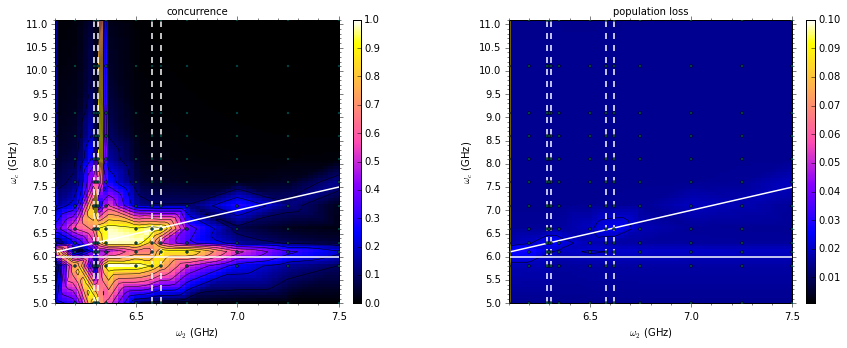

In [6]:
def plot_field_free_data(stage1_table):
    """Plot field-free concurrence"""
    plots = PlotGrid()
    table = stage1_table[stage1_table['category']=='field_free']
    plots.add_cell(table['w2 [GHz]'], table['wc [GHz]'], table['C'],
                   vmin=0.0, vmax=1.0, title='concurrence')
    plots.add_cell(table['w2 [GHz]'], table['wc [GHz]'], table['loss'],
                   vmin=1e-3, vmax=0.1, title='population loss')
    plots.plot(quiet=True, show=True)
plot_field_free_data(stage1_table)

In [7]:
from select_for_stage2 import select_for_stage2
from notebook_utils import get_Q_table, plot_C_loss

In [8]:
t_PE = select_for_stage2(stage1_table, 'PE')
t_SQ = select_for_stage2(stage1_table, 'SQ')

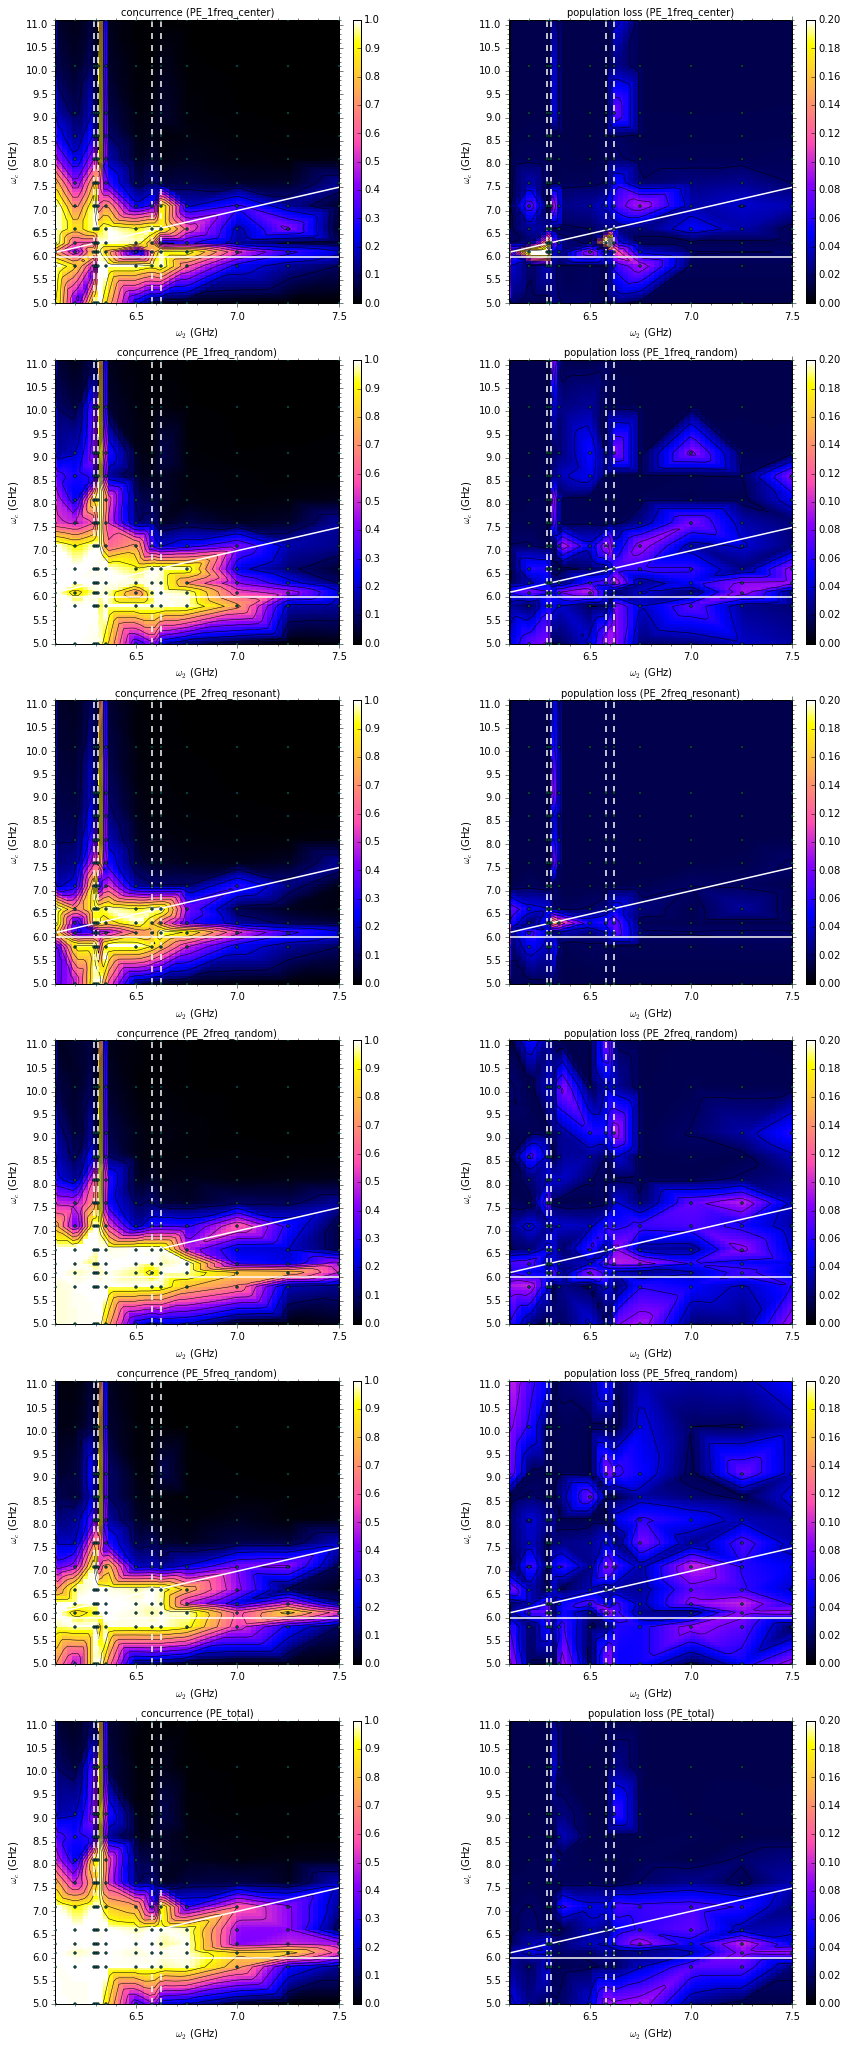

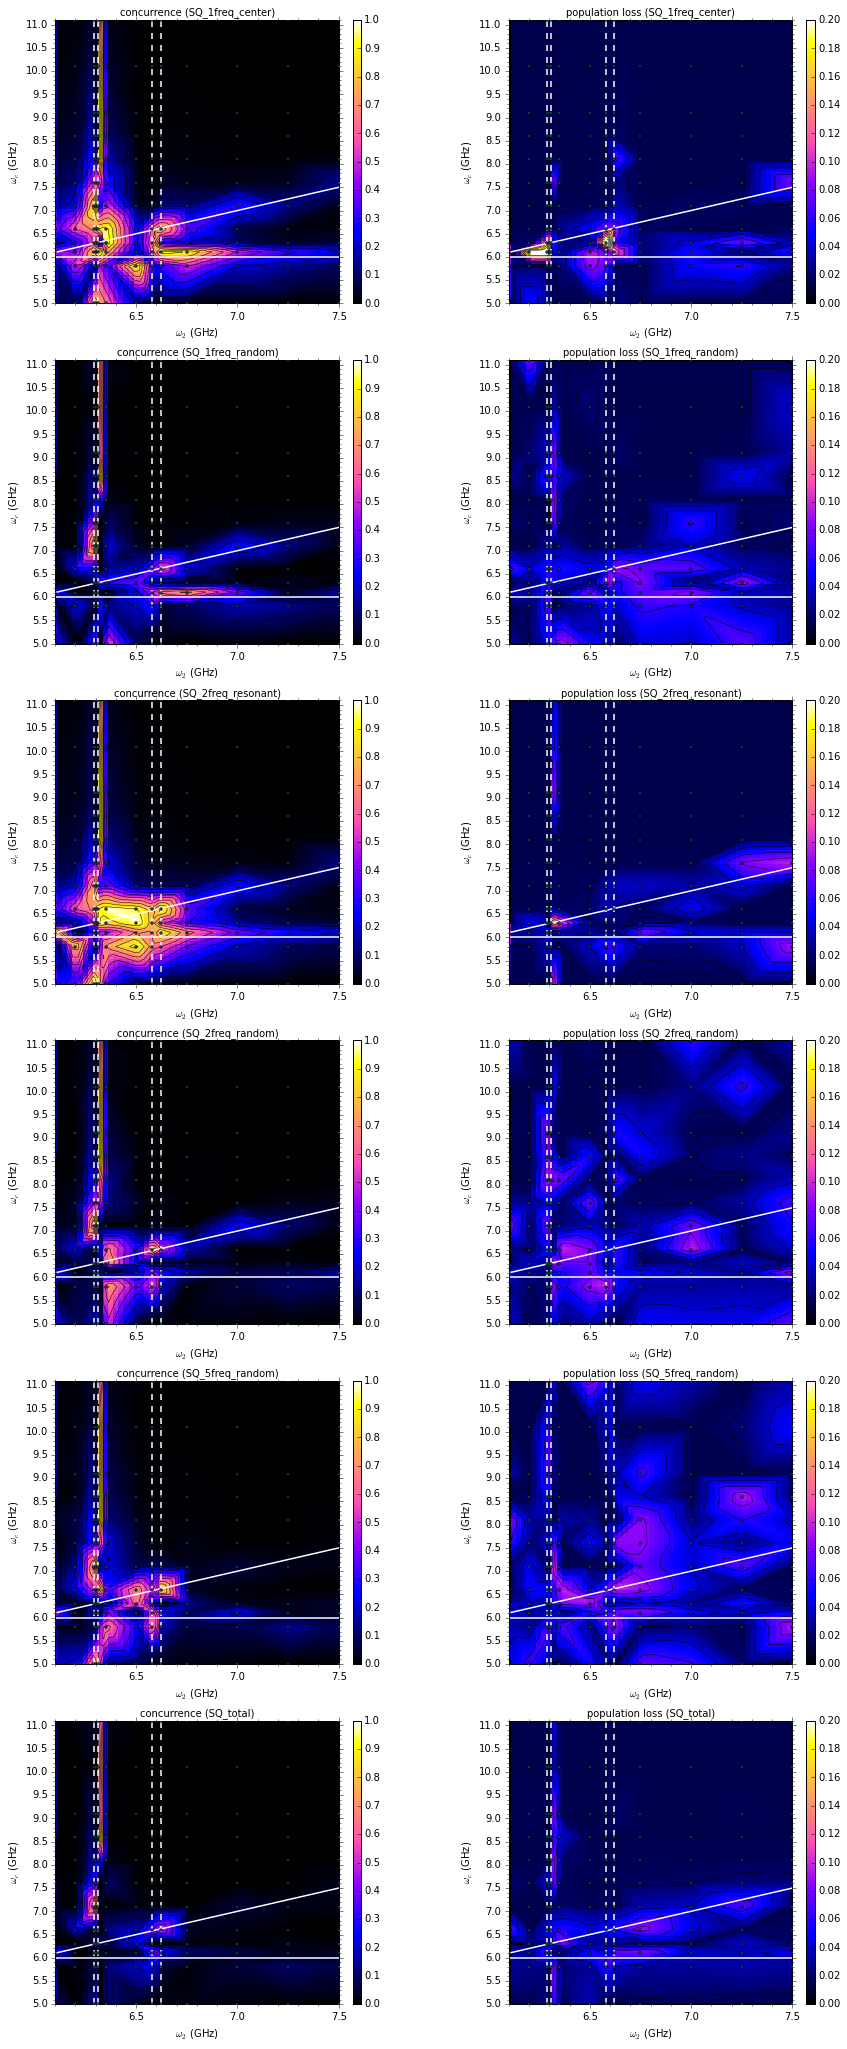

In [12]:
plot_C_loss(t_PE, 'PE', loss_max=0.2)
plot_C_loss(t_SQ, 'SQ', loss_max=0.2)

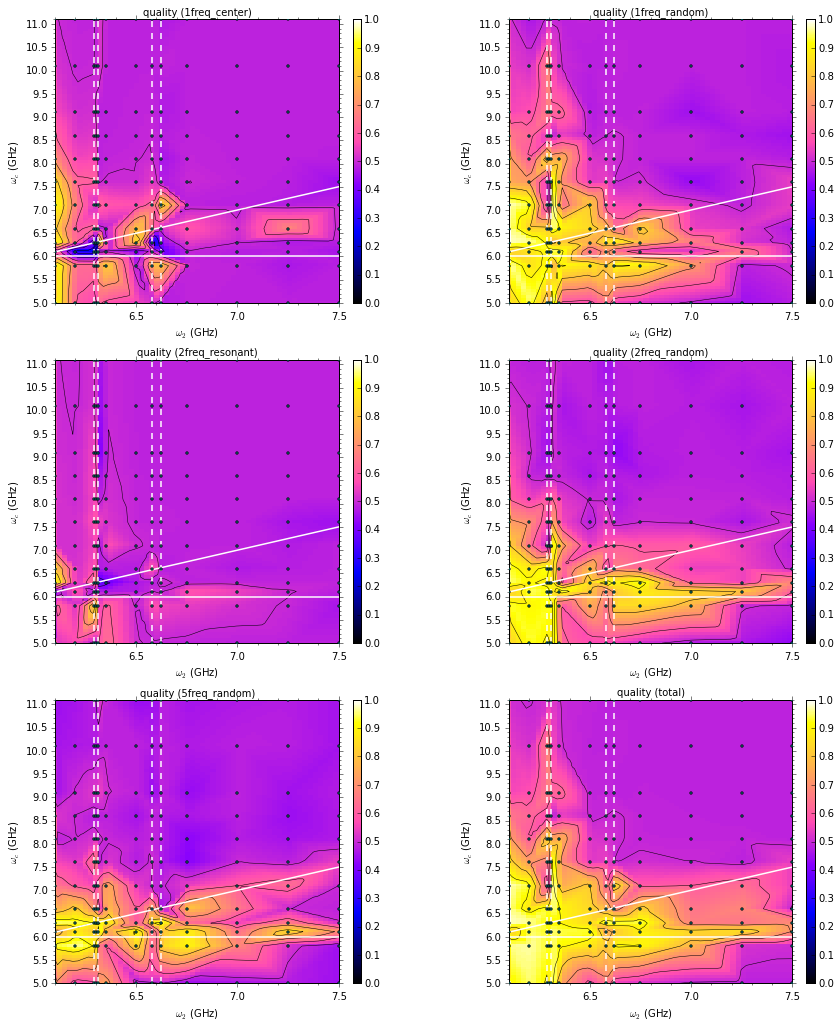

In [10]:
plot_quality(t_PE, t_SQ)